# MOOC Course Design Optimization

## - Learning Analytics on OULAD dataset

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Loading Raw data

### Student demographics

In [295]:
student_info = pd.read_csv('studentInfo.csv')
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [3]:
student_info.describe(include='all')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


### Student activities

In [4]:
# student regsitration
student_reg = pd.read_csv('studentRegistration.csv')
student_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [5]:
# student assessment
student_assess = pd.read_csv('studentAssessment.csv')
student_assess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
# student VLE - interation with virtual learning environment
student_vle = pd.read_csv('studentVle.csv')
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [7]:
student_reg.describe(include='all')

,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000


In [8]:
student_assess.describe(include='all')

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [9]:
student_vle.describe(include='all')

,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,4014499,3619452,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,NaN,NaN,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,NaN,NaN,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,NaN,NaN,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00


### Course information

In [101]:
# course basic info
course_basic = pd.read_csv('courses.csv')
course_basic

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [11]:
# course assessments
course_assess = pd.read_csv('assessments.csv')
course_assess.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [12]:
# course materials
course_vle = pd.read_csv('vle.csv')
course_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [13]:
course_vle.describe(include='all')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


## Data processing

## Student demographics information

In [339]:
# imd_band - ordinal
student_info_base = student_info.copy()
student_info_base['imd_band'] = student_info_base['imd_band'].apply(lambda x: '10-20%' if x=='10-20' 
                                                                    or x=='20-Oct' else x)
student_info_base.dropna(subset=['imd_band'],inplace=True)
ordered_imbband = ['0-10%','10-20%','20-30%', '30-40%', '40-50%',
                   '50-60%','60-70%',  '70-80%','80-90%','90-100%']
student_info_base['imd_band'] = student_info_base['imd_band'].astype("category",
                                                ordered=True,categories=ordered_imbband)
                                      
# education level - ordinal
ordered_education = ['No Formal quals','Lower Than A Level',
                     'A Level or Equivalent','HE Qualification','Post Graduate Qualification']
student_info_base['highest_education'] = student_info_base['highest_education'].astype("category",
                                                        ordered=True,categories=ordered_education)

# age band - ordinal
ordered_ageband = ['0-35','35-55','55<=']
student_info_base['age_band'] = student_info_base['age_band'].astype("category",
                                                        ordered=True,categories=ordered_ageband)

# generate feature df
student_info_feature = student_info_base.copy()
# encode categorical feature to numeric
student_info_feature['highest_education'] = student_info_feature['highest_education'].cat.codes
student_info_feature['age_band'] = student_info_feature['age_band'].cat.codes
student_info_feature['imd_band'] = student_info_feature['imd_band'].cat.codes
# final result - combine pass and distinct to pass
student_info_feature['final_result'].where(student_info_feature['final_result']!='Distinction',
                                           'Pass',inplace=True)
# One Hot Encoding
# Male 1, Female 0
student_info_feature['gender'] = student_info_feature['gender'].apply(lambda x: 0 if x == 'F' else 1)
# Disable 1, Not disable 0
student_info_feature['disability'] = student_info_feature['disability'].apply(lambda x: 0 if x == 'N' else 1)

student_info_feature.drop(['region'],axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [340]:
# set index
student_info_feature.set_index(['code_module','code_presentation','id_student'],inplace=True)
student_info_feature

gender  highest_education  imd_band  \
code_module code_presentation id_student                                        
AAA         2013J             11391            1                  3         9   
                              28400            0                  3         2   
                              30268            0                  2         3   
                              31604            0                  2         5   
                              32885            0                  1         5   
                              38053            1                  2         8   
                              45462            1                  3         3   
                              45642            0                  2         9   
                              52130            0                  2         7   
                              57506            1                  1         7   
                              58873            0                  2         2   
                              59185            1                  1         6   
                              62155            0                  3         5   
                              63400            1                  1         4   
                              65002            0                  2         7   
                              70464            0                  2         6   
                              74372            1                  2         1   
                              75091            1                  2         3   
                              77367            1                  2         3   
                              91265            1                  3         0   
                              94961            1                  1         7   
                              98094            1                  1         7   
                              100893           1                  2         2   
                              101781           1                  1         8   
                              102806           1                  2         3   
                              102952           1                  3         6   
                              106247           1                  3         8   
                              106577           1                  1         2   
                              110175           1                  3         8   
                              111717           0                  3         9   
...                                          ...                ...       ...   
GGG         2014J             1950911          0                  1         4   
                              1977701          0                  1         5   
                              2004143          0                  1         5   
                              2052942          0                  1         5   
                              2053521          0                  2         2   
                              2203216          0                  2         8   
                              2214722          0                  2         7   
                              2239862          1                  1         5   
                              2268380          0                  1         2   
                              2270562          0                  1         6   
                              2271766          0                  2         3   
                              2282141          1                  2         0   
                              2311714          0                  1         3   
                              2338614          0                  2         0   
                              2342238          1                  3         8   
                              2357806          0                  1         4   
                              2373245          1                  1      

## Student Registration

In [342]:
# feature df
student_reg_feature = student_reg.copy()

# registration date - early bird/regular reg/late reg/last minute
student_reg_feature = pd.merge(student_reg_feature,course_basic,how='left',
                               on=['code_module','code_presentation'])

# student registration - fill missing value
student_reg_feature['date_registration'].fillna(method='ffill',inplace=True)
# student registration - categorical
student_reg_feature['date_registration'] = pd.Series(np.where(student_reg_feature['date_registration']<=-30,'Early Bird',
         np.where(student_reg_feature['date_registration']<=0.2*student_reg_feature['module_presentation_length'],'Regular Reg',
             np.where(student_reg_feature['date_registration']<=0.5*student_reg_feature['module_presentation_length'],'Late Reg',
                'Last Minite'))))
# OHE student registration
student_reg_feature = pd.concat([student_reg_feature,
                                 pd.get_dummies(student_reg_feature['date_registration'])],axis=1)

# drop module_presentation_length,date_registration
student_reg_feature.drop(['module_presentation_length','date_registration'],axis=1,inplace=True)

# set index
student_reg_feature.set_index(['code_module','code_presentation','id_student'],inplace=True)
student_reg_feature

date_unregistration  Early Bird  \
code_module code_presentation id_student                                    
AAA         2013J             11391                       NaN           1   
                              28400                       NaN           1   
                              30268                      12.0           1   
                              31604                       NaN           1   
                              32885                       NaN           1   
                              38053                       NaN           1   
                              45462                       NaN           1   
                              45642                       NaN           0   
                              52130                       NaN           1   
                              53025                       NaN           1   
                              57506                       NaN           1   
                              58873                       NaN           1   
                              59185                       NaN           1   
                              62155                       NaN           1   
                              63400                       NaN           1   
                              65002                      96.0           1   
                              70464                       NaN           1   
                              71361                       NaN           1   
                              74372                       NaN           1   
                              75091                       NaN           1   
                              77367                       NaN           0   
                              91265                       NaN           1   
                              94961                      72.0           1   
                              98094                       NaN           1   
                              100893                      NaN           1   
                              101781                      NaN           1   
                              102806                      NaN           1   
                              102952                      NaN           1   
                              104476                      NaN           1   
                              106247                    175.0           0   
...                                                       ...         ...   
GGG         2014J             1950911                     NaN           0   
                              1977701                     NaN           1   
                              2004143                     NaN           1   
                              2052942                     NaN           0   
                              2053521                     NaN           1   
                              2203216                   125.0           0   
                              2214722                   206.0           0   
                              2239862                   -43.0           1   
                              2268380                     NaN           1   
                              2270562                     NaN           0   
                              2271766                     NaN           0   
                              2282141                    62.0           1   
                              2311714                     NaN           1   
                              2338614                    58.0           0   
                              2342238                    74.0           1   
                              2357806                    73.0           1   
                              2373245                     NaN           1   
                              2378591                     NaN           1   
                              2456431                     NaN           1   
                              2475886 

## Student VLE

In [343]:
# group VLE data by student
studentVle_new  = student_vle.groupby(["code_module","code_presentation","id_student","date"]).agg('sum')
vle = studentVle_new.groupby(["code_module","code_presentation","id_student"]).agg('sum')
vle

id_site  sum_click
code_module code_presentation id_student                      
AAA         2013J             11391       107152743        934
                              28400       235082915       1435
                              30268        41550803        281
                              31604       362470398       2158
                              32885       192445868       1034
                              38053       395256463       2445
                              45462       194082992       1492
                              45642       290304037       1428
                              52130       324210061       1894
                              53025       494203477       3158
                              57506       220336174       1319
                              58873       287574157       1732
                              59185       188617767       1102
                              62155       536297007       3388
                              63400       415504907       2737
                              65002        29523092        171
                              70464       112076634       1053
                              71361       398011759       2327
                              74372        39363366        116
                              75091       412220476       2992
                              77367       148159967        680
                              91265       271174087       1494
                              94961        55767176        339
                              98094       211033335       2839
                              100893      132854169        744
                              101781      499157996       4104
                              102806      426961981       1944
                              102952      171123469       1150
                              104476      542360146       4777
                              106247       79276514        465
...                                             ...        ...
GGG         2014J             1931810     229632177        727
                              1950911     243987761        986
                              1977701     170429473        545
                              2004143      99565434        382
                              2052942      59201759        200
                              2053521     304074170       1056
                              2203216      69968349        232
                              2214722      51127675        410
                              2268380     142619537        663
                              2270562     621595573       1926
                              2271766      83418809        288
                              2282141      65481317        208
                              2311714     357003125       1339
                              2338614      17043618         51
                              2342238      22425562        118
                              2357806      10763699         58
                              2373245     174019576        565
                              2378591      67272814        230
                              2456431     611742409       2151
                              2475886       7176174          9
                              2508153     202720682        598
                              2533195     183882436        755
                              2606765      71759707        236
                              2608143      16146199         37
                              2620947     162354782        476
                              2640965      17043811         41
                              2645731     212591497        893
                              2648187      96875459        312
                              2679821      54716352        275
                              2684003     162353469        616

[29228 rows x 2 columns]

In [153]:
# generate row index vector
indexs = []
for i in studentVle_new.index:
    index = i[:3]
    indexs.append(index)

# student VLE information dictionary
info = {}
for i in set(indexs):
    # total number of clicks
    click_info = studentVle_new.loc[i].describe()["sum_click"]
    # first learning date, last learning date
    max_date = studentVle_new.loc[i].index[-1]
    min_date = studentVle_new.loc[i].index[0]
    # std of clicks every time of study
    std = click_info["std"]
    if np.isnan(std):
        std = 0
    # average click per time of study, std of clicks every time of study, start learning date, end learning date
    info[i]=[[click_info["mean"],std,click_info["count"],max_date,min_date]]

In [451]:
# k-means clustering based on student learning behavior
l = []
for i in info.values():
    l.append(i[0])
X = np.array(l)
norm_X = preprocessing.scale(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(norm_X)
print('mean\t\t','std\t\t','count\t','max_date\t','min_date\t')
print(kmeans.cluster_centers_)
label = kmeans.labels_
vle["learning_pattern"] = label
vle["learning_pattern"].value_counts()

mean		 std		 count	 max_date	 min_date	
[[-0.38964682 -0.44570816 -0.87410493 -1.38921557  0.1387411 ]
 [ 0.26776743  0.18259178  1.43892596  0.7717528  -0.50877559]
 [ 1.86917692  1.91852483  0.1780922   0.30487236 -0.13142677]
 [-0.39439586 -0.31860551 -0.19402202  0.53214908  0.21728714]]


3    11213
0     8491
1     6284
2     3240
Name: learning_pattern, dtype: int64

In [452]:
# OHE learning pattern
vle_feature = pd.concat([vle,pd.get_dummies(vle['learning_pattern'],
                            prefix='learning_pattern')],axis=1)
# drop site_id
vle_feature.drop('id_site',axis=1,inplace=True)
vle_feature

sum_click  learning_pattern  \
code_module code_presentation id_student                                
AAA         2013J             11391             934                 0   
                              28400            1435                 3   
                              30268             281                 1   
                              31604            2158                 0   
                              32885            1034                 3   
                              38053            2445                 3   
                              45462            1492                 2   
                              45642            1428                 3   
                              52130            1894                 3   
                              53025            3158                 3   
                              57506            1319                 0   
                              58873            1732                 0   
                              59185            1102                 3   
                              62155            3388                 2   
                              63400            2737                 3   
                              65002             171                 2   
                              70464            1053                 1   
                              71361            2327                 2   
                              74372             116                 2   
                              75091            2992                 1   
                              77367             680                 3   
                              91265            1494                 0   
                              94961             339                 0   
                              98094            2839                 0   
                              100893            744                 3   
                              101781           4104                 2   
                              102806           1944                 0   
                              102952           1150                 2   
                              104476           4777                 3   
                              106247            465                 3   
...                                             ...               ...   
GGG         2014J             1931810           727                 3   
                              1950911           986                 3   
                              1977701           545                 3   
                              2004143           382                 3   
                              2052942           200                 3   
                              2053521          1056                 3   
                              2203216           232                 1   
                              2214722           410                 3   
                              2268380           663                 3   
                              2270562          1926                 1   
                              2271766           288                 1   
                              2282141           208                 3   
                              2311714          1339                 1   
                              2338614            51                 0   
                              2342238           118                 0   
                              2357806            58                 0   
                              2373245           565                 3   
                              2378591           230                 3   
                              2456431          2151                 3   
                              2475886             9                 1   
                              2508153           598                 1   
                              2533195           755                 1   
                           

## Student assessment

In [453]:
# fill the blank final exam date in course_assess with the length of module in course_basic
for code_module,code_presentation in zip(course_basic["code_module"],course_basic["code_presentation"]):
    exam_date = course_basic["module_presentation_length"][(course_basic["code_module"]==code_module)&(course_basic["code_presentation"]==code_presentation)]
    origin_exam_date = course_assess["date"][(course_assess["code_module"]==code_module)&(course_assess["code_presentation"]==code_presentation)&(course_assess["assessment_type"]=="Exam")]
    if np.isnan(origin_exam_date).any():
        course_assess["date"][(course_assess["code_module"]==code_module)&(course_assess["code_presentation"]==code_presentation)&(course_assess["assessment_type"]=="Exam")] = int(exam_date) 

In [454]:
student_assess_merge = pd.merge(student_assess,course_assess, how="left",on=["id_assessment"])
student_assess_merge = pd.merge(student_assess_merge,pd.DataFrame(student_info_feature["final_result"]),
                                how="left",on=["code_module","code_presentation","id_student"])
student_assess_merge["sub_diff"] = student_assess_merge["date_submitted"]-student_assess_merge["date"]

In [455]:
group_student_assess_merge = student_assess_merge.groupby(["id_student","code_module","code_presentation"])

# avg date of doing assessment before ddl
avg_ahead_ddl = pd.DataFrame(group_student_assess_merge["sub_diff"].mean())
avg_ahead_ddl = avg_ahead_ddl.rename(columns={"sub_diff":"avg_ahead_ddl"})
avg_ahead_ddl.reset_index(inplace=True)

#  std of assessments
std_assess_score = pd.DataFrame(group_student_assess_merge["score"].std())
std_assess_score = std_assess_score.rename(columns={"score":"std_assess_score"})
std_assess_score.reset_index(inplace=True)

## Feature Integration

In [456]:
feature_set = student_info_feature.join(student_reg_feature,how='left')
feature_set = feature_set.join(vle_feature,how='left')
feature_set = pd.merge(feature_set,avg_ahead_ddl,how="left",on=["code_module","code_presentation","id_student"])
feature_set = pd.merge(feature_set,std_assess_score,how="left",on=["code_module","code_presentation","id_student"])

# drop students unregistered before course begins
feature_set = feature_set[~(feature_set['date_unregistration']<0)]
# drop col unreg date
feature_set.drop(['date_unregistration',"code_module","code_presentation","id_student",'learning_pattern'],axis=1,inplace=True)
feature_set

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Early Bird,Last Minite,Late Reg,Regular Reg,sum_click,learning_pattern_0,learning_pattern_1,learning_pattern_2,learning_pattern_3,avg_ahead_ddl,std_assess_score
0,1,3,9,2,0,240,0,Pass,1,0,0,0,934.0,1.0,0.0,0.0,0.0,-1.800000,3.082207
1,0,3,2,1,0,60,0,Pass,1,0,0,0,1435.0,0.0,0.0,0.0,1.0,0.000000,4.335897
2,0,2,3,1,0,60,1,Withdrawn,1,0,0,0,281.0,0.0,1.0,0.0,0.0,NaN,NaN
3,0,2,5,1,0,60,0,Pass,1,0,0,0,2158.0,1.0,0.0,0.0,0.0,-2.000000,6.892024
4,0,1,5,0,0,60,0,Pass,1,0,0,0,1034.0,0.0,0.0,0.0,1.0,11.400000,20.513410
5,1,2,8,1,0,60,0,Pass,1,0,0,0,2445.0,0.0,0.0,0.0,1.0,2.000000,10.977249
6,1,3,3,0,0,60,0,Pass,1,0,0,0,1492.0,0.0,0.0,1.0,0.0,0.400000,4.949747
7,0,2,9,0,0,120,0,Pass,0,0,0,1,1428.0,0.0,0.0,0.0,1.0,2.600000,0.547723
8,0,2,7,0,0,90,0,Pass,1,0,0,0,1894.0,0.0,0.0,0.0,1.0,1.400000,2.607681
9,1,1,7,1,0,60,0,Pass,1,0,0,0,1319.0,1.0,0.0,0.0,0.0,-0.800000,5.656854


In [457]:
feature_set.columns

Index(['gender', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'Early Bird', 'Last Minite', 'Late Reg', 'Regular Reg', 'sum_click',
       'learning_pattern_0', 'learning_pattern_1', 'learning_pattern_2',
       'learning_pattern_3', 'avg_ahead_ddl', 'std_assess_score'],
      dtype='object')

In [462]:
feature_set.to_csv('feature.csv')

## Machine Learning
- Logistic regression

In [458]:
# change to binary - pass/fail
feature_set_binary = feature_set.copy()
feature_set_binary['final_result'][feature_set_binary['final_result']=='Withdrawn'] = 'Fail'
feature_set_binary['final_result'].value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pass    14655
Fail    14206
Name: final_result, dtype: int64

In [459]:
def get_model_set(df,dropna=True,test_size=0.25):
    if dropna: 
        df = df.dropna()
    # train test split
    train, test = train_test_split(df,test_size=test_size)
    # seperate x and y
    y_train = train['final_result']
    x_train = train.drop('final_result',axis=1)
    y_test = test['final_result']
    x_test = test.drop('final_result',axis=1)
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test = get_model_set(feature_set_binary,dropna=True,test_size=0.25)

## Logistic regression

In [460]:
def logistic_regression(x_train,y_train,Cs=10,max_iter=500):
    logistic_model = LogisticRegressionCV(Cs=10,max_iter=500)
    logistic_model.fit(x_train,y_train)
    # predict on test data
    train_acc = metrics.accuracy_score(y_train,logistic_model.predict(x_train))
    test_acc = metrics.accuracy_score(y_test,logistic_model.predict(x_test))
#     print(train_acc)
#     print(test_acc)
    print('Logistic regression test accuracy:',test_acc)
    return logistic_model,train_acc,test_acc

logistic_model,train_acc,test_acc = logistic_regression(x_train,y_train,Cs=10,max_iter=500)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Logistic regression test accuracy: 0.7314930991217063


In [461]:
# result analysis
feature_name = list(x_train.columns)
coefficent = logistic_model.coef_.tolist()
intercept = logistic_model.intercept_.tolist()
mapped = list(zip(feature_name,coefficent[0]))
pd.DataFrame(mapped,columns=['Feature','Coefficient'])

,Feature,Coefficient
0,gender,-0.553125
1,highest_education,0.249198
2,imd_band,0.059923
3,age_band,-0.007114
4,num_of_prev_attempts,-0.232483
5,studied_credits,-0.005808
6,disability,-0.097868
7,Early Bird,-0.004587
8,Last Minite,-0.000683
9,Late Reg,0.002799


In [450]:
params = np.append(logistic_model.intercept_,logistic_model.coef_)
y_predict = logistic_model.predict(x_test)

newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
MSE = (sum((y_test!=y_predict)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

LinAlgError: Singular matrix

In [435]:
class LinearRegression(linear_model.LogisticRegressionCV):
    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

## Random forest

In [407]:
RF_model = RandomForestClassifier(n_estimators=15,max_depth=10,max_leaf_nodes=64)
RF_model.fit(x_train,np.ravel(y_train))
score = RF_model.score(x_test,y_test)
print('Random forest accuracy:',score)

Random forest accuracy: 0.7804265997490589


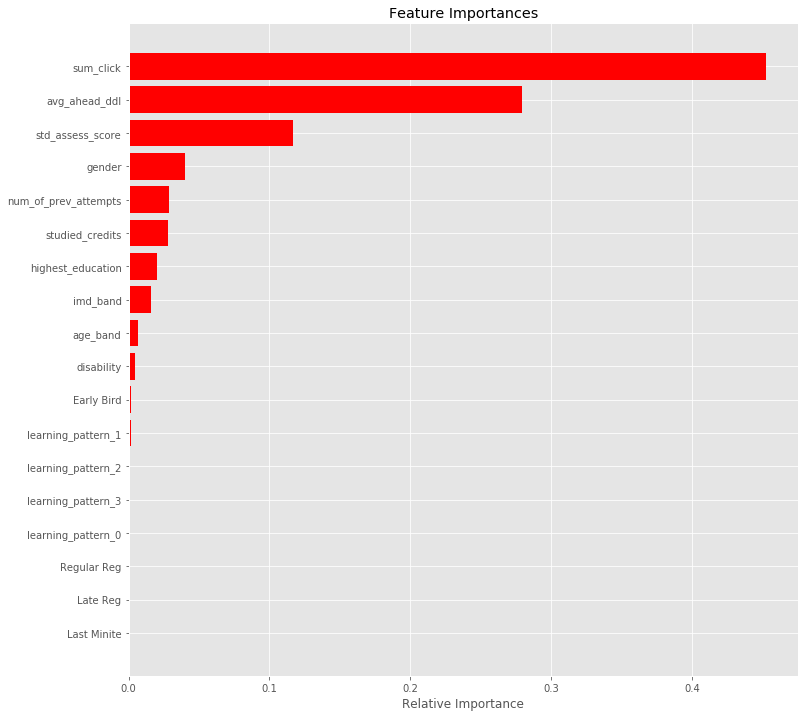

In [421]:
# use dataset with reviews as example for analysis
importances = RF_model.feature_importances_
indices = np.argsort(importances)
feature_names = x_train.columns

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

plt.barh(range(len(indices)), importances[indices], color='R', align='center')
dummy = plt.yticks(range(len(indices)),feature_names[indices])

Simple decision tree accuracy: 0.7675210611220649


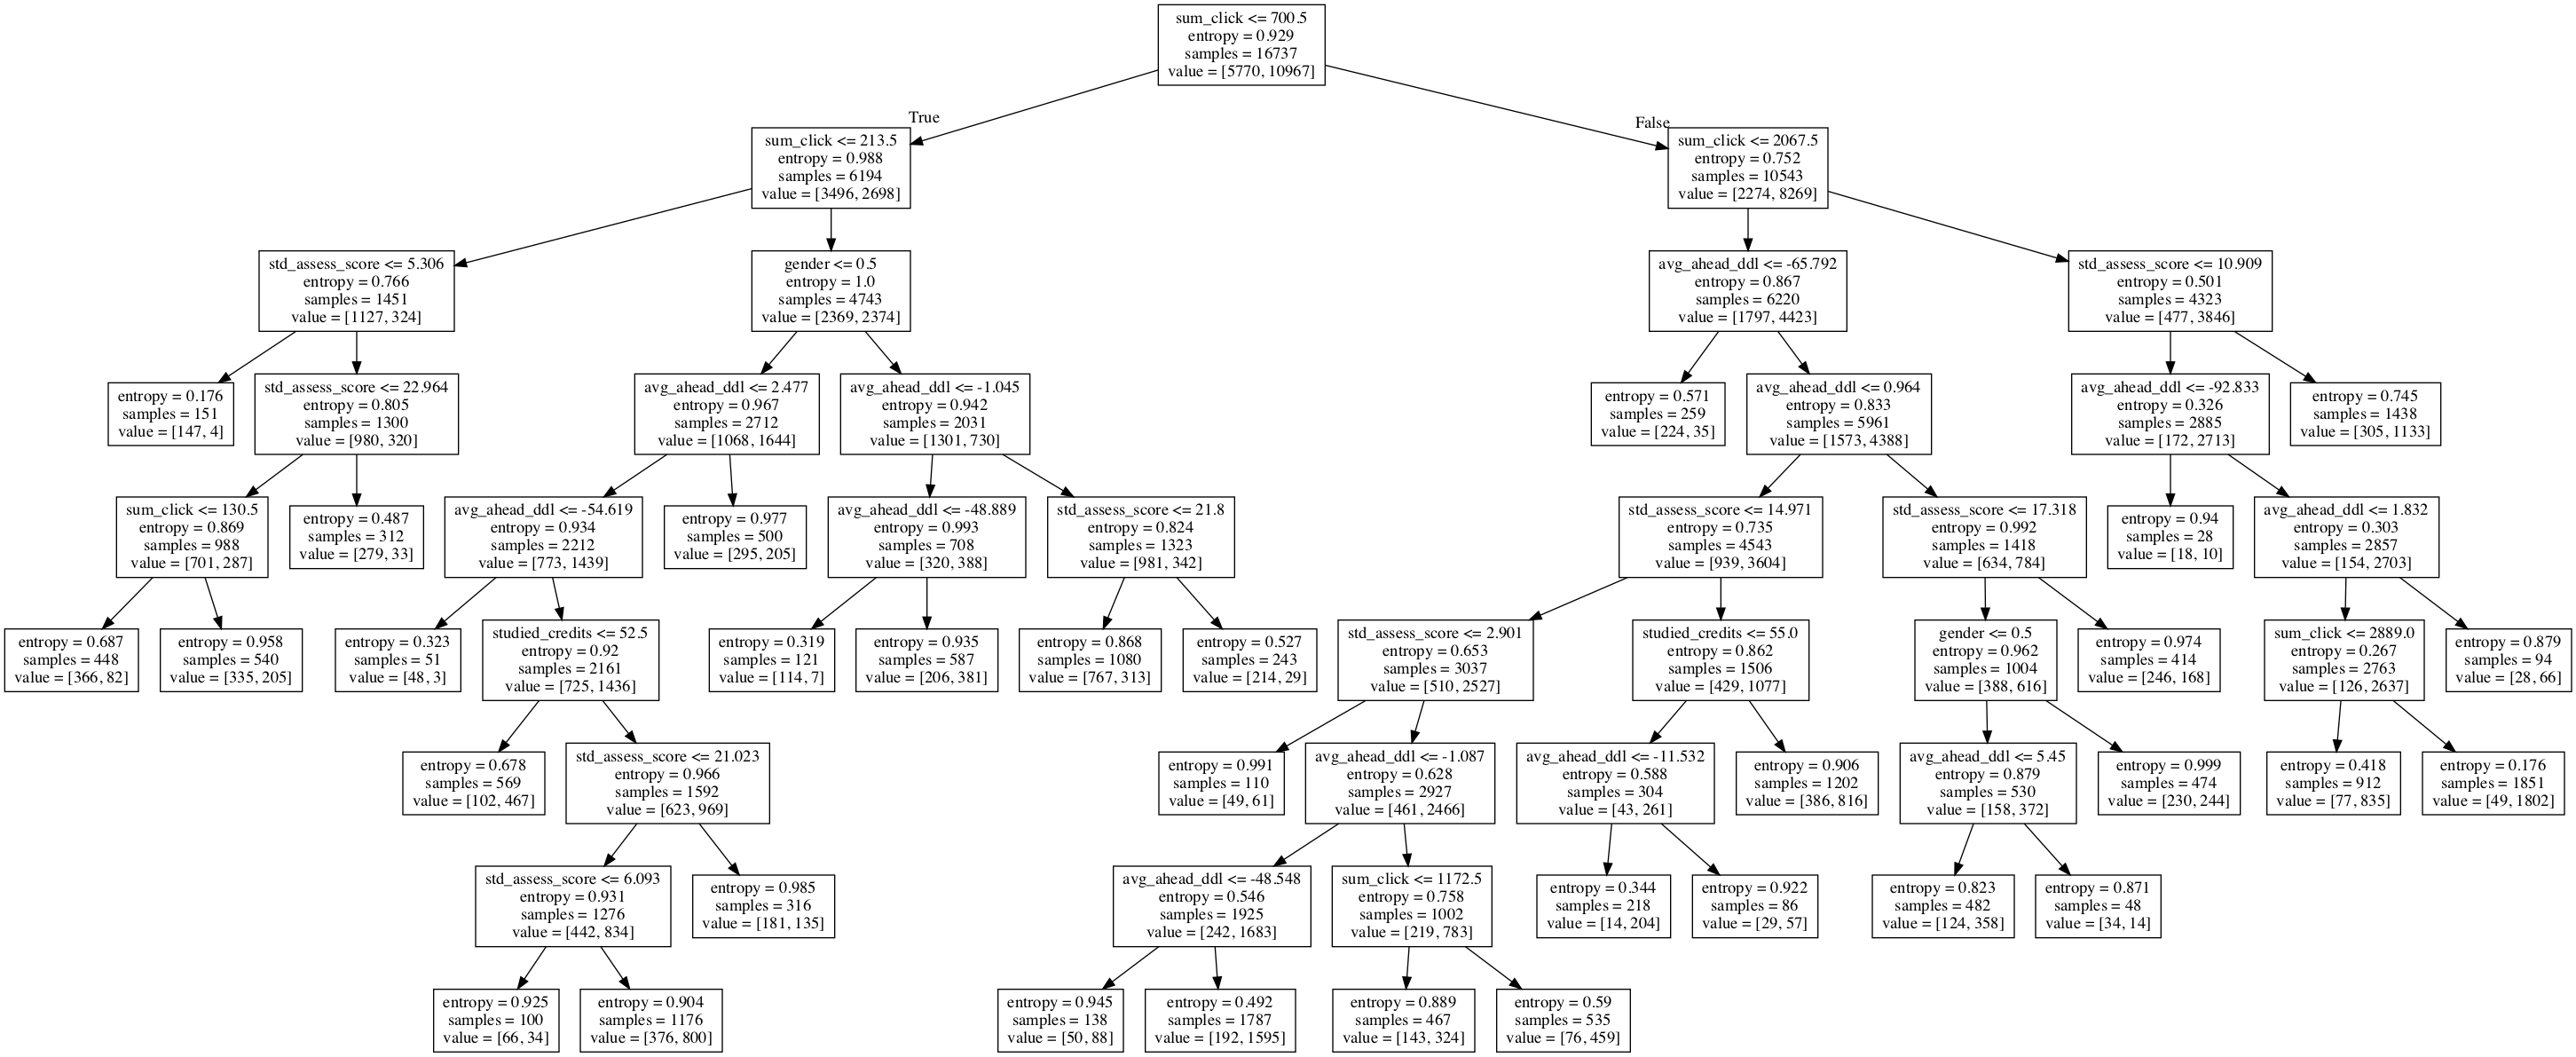

In [418]:
import pydotplus 
from IPython.display import Image
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_leaf_nodes=32,max_depth=10,criterion='entropy')
tree_model.fit(x_train,y_train)
feature_names = x_train.columns
dot_data = tree.export_graphviz(tree_model,out_file=None,feature_names=feature_names) 
score = model.score(x_test,y_test)
print('Simple decision tree accuracy:',score)


Image(pydotplus.graphviz.graph_from_dot_data(dot_data).create_png())

In [416]:
tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')